# This notebook contains data preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [2]:
sns.set()
%matplotlib inline

# Load data

In [92]:
df = pd.read_csv('data/data.csv', sep=';')
df.head()

,Дата,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
0,01.03.2021,Алтайский край,43666,38979,1511,9,133,94
1,27.12.2020,Еврейская АО,3680,2662,68,1,16,33
2,23.09.2020,Брянская обл.,9117,7387,37,0,39,34
3,26.09.2020,Костромская обл.,4553,3329,67,5,54,44
4,25.10.2020,Нижегородская обл.,39260,33221,711,11,396,224


In [93]:
df.columns = ['date', 'region', 'total_infected', 'total_recovered', 'total_dead', 'deaths_per_day', 'infected_per_day', 'recovered_per_day']
df = df[df.region == 'Москва'].reset_index()
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['infected'] = df['total_infected'] - df['total_recovered'] - df['total_dead']
df = df.drop(columns=['index', 'region'])
df = df.sort_values(by='date')
df.index = df.date
df['date'] = df.date.asfreq('D')
df.head()

,date,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected
date,,,,,,,,
2020-03-12,2020-03-12,21,0,0,0,21,0,21
2020-03-13,2020-03-13,26,0,0,0,5,0,26
2020-03-14,2020-03-14,35,0,0,0,9,0,35
2020-03-15,2020-03-15,35,1,0,0,0,1,34
2020-03-16,2020-03-16,53,1,0,0,18,0,52


In [94]:
assert (pd.date_range(start=df.date.iloc[0], end=df.date.iloc[-1], freq='D') == df.date).all()

In [96]:
df.index = pd.date_range(start=df.date.iloc[0], end=df.date.iloc[-1], freq='D')
df.index 

DatetimeIndex(['2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21',
               ...
               '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-21',
               '2021-03-22', '2021-03-23'],
              dtype='datetime64[ns]', length=377, freq='D')

In [97]:
df.date

2020-03-12   2020-03-12
2020-03-13   2020-03-13
2020-03-14   2020-03-14
2020-03-15   2020-03-15
2020-03-16   2020-03-16
                ...    
2021-03-19   2021-03-19
2021-03-20   2021-03-20
2021-03-21   2021-03-21
2021-03-22   2021-03-22
2021-03-23   2021-03-23
Freq: D, Name: date, Length: 377, dtype: datetime64[ns]

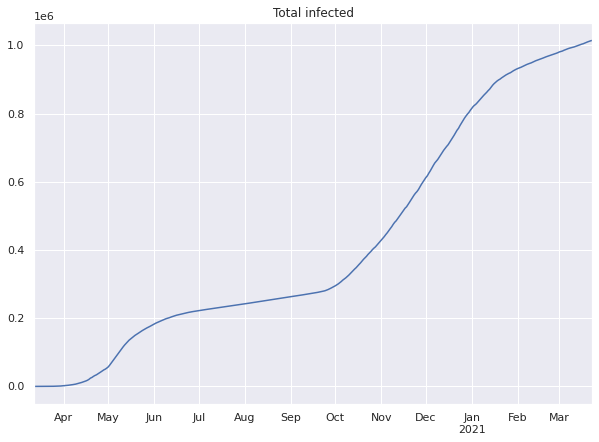

In [98]:
plt.figure(figsize=(10,7))
df.total_infected.plot()
plt.title("Total infected")
plt.show()

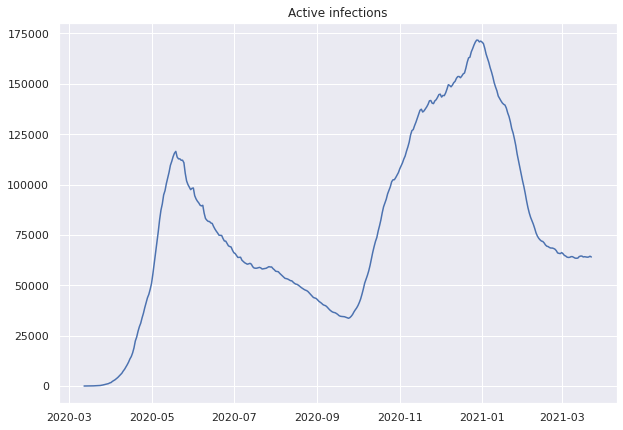

In [99]:
plt.figure(figsize=(10,7))
plt.plot(df.date, df.infected)
plt.title("Active infections")
plt.show()

In [100]:
df_smoothed = df.rolling(7).mean().round(5)
df_smoothed.columns = [col + '_ma7' for col in df_smoothed.columns]
df_smoothed.head(10)

,total_infected_ma7,total_recovered_ma7,total_dead_ma7,deaths_per_day_ma7,infected_per_day_ma7,recovered_per_day_ma7,infected_ma7
2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,44.42857,0.57143,0.0,0.0,12.28571,0.14286,43.85714
2020-03-19,55.42857,0.71429,0.0,0.0,11.00000,0.14286,54.71429
2020-03-20,70.42857,1.42857,0.0,0.0,15.00000,0.71429,69.00000
2020-03-21,85.00000,2.57143,0.0,0.0,14.57143,1.14286,82.42857


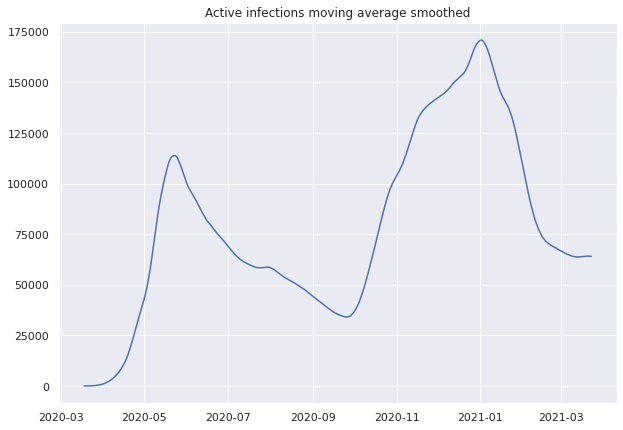

In [101]:
plt.figure(figsize=(10,7))
plt.plot(df.date, df_smoothed.infected_ma7)
plt.title("Active infections moving average smoothed")
plt.show()

In [102]:
full_df = pd.concat([df, df_smoothed], axis=1)

for column in full_df.columns:
    if column.endswith('_ma7'):
        original_column = column.strip('_ma7')
        full_df[column] = full_df[column].fillna(full_df[original_column])
        
full_df.head()

,date,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected,total_infected_ma7,total_recovered_ma7,total_dead_ma7,deaths_per_day_ma7,infected_per_day_ma7,recovered_per_day_ma7,infected_ma7
2020-03-12,2020-03-12,21,0,0,0,21,0,21,21.0,0.0,0.0,0.0,21.0,0.0,21.0
2020-03-13,2020-03-13,26,0,0,0,5,0,26,26.0,0.0,0.0,0.0,5.0,0.0,26.0
2020-03-14,2020-03-14,35,0,0,0,9,0,35,35.0,0.0,0.0,0.0,9.0,0.0,35.0
2020-03-15,2020-03-15,35,1,0,0,0,1,34,35.0,1.0,0.0,0.0,0.0,1.0,34.0
2020-03-16,2020-03-16,53,1,0,0,18,0,52,53.0,1.0,0.0,0.0,18.0,0.0,52.0


In [103]:
full_df.to_csv('data/moscow_prepared.csv', index=False)

In [104]:
full_df.date

2020-03-12   2020-03-12
2020-03-13   2020-03-13
2020-03-14   2020-03-14
2020-03-15   2020-03-15
2020-03-16   2020-03-16
                ...    
2021-03-19   2021-03-19
2021-03-20   2021-03-20
2021-03-21   2021-03-21
2021-03-22   2021-03-22
2021-03-23   2021-03-23
Freq: D, Name: date, Length: 377, dtype: datetime64[ns]